In [5]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import skfuzzy as fuzz


In [ ]:
pip install scikit-fuzzy

In [ ]:
# Налаштування для графіків
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# =========================
# Крок 1: Підготовка даних
# =========================

In [7]:


# Завантаження даних Iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# Для кластеризації будемо використовувати лише ознаки, без міток
X = data.values

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# =========================
# Крок 2: Кластеризація у вихідному просторі
# =========================

In [8]:

n_clusters = 3  # для Iris

# ---- K-Means ----
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
print("K-Means silhouette score:", score_kmeans)

K-Means silhouette score: 0.4798814508199817


In [9]:
# ---- Fuzzy C-Means ----
# Для skfuzzy дані потрібно транспонувати (ознаки - рядки)
X_t = X_scaled.T

# Параметри для FCM
m = 2.0  # показник нечіткості
error = 0.005
maxiter = 1000

# Виконання Fuzzy C-Means кластеризації
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_t, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None, seed=42
)

# Отримання "жорсткого" розбиття: вибір кластера з найбільшою мірою членства
labels_fcm = np.argmax(u, axis=0)
score_fcm = silhouette_score(X_scaled, labels_fcm)
print("Fuzzy C-Means silhouette score:", score_fcm)

Fuzzy C-Means silhouette score: 0.45844171606773937


In [10]:
# ---- Gaussian Mixture Models (GMM) ----
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X_scaled)
# Отримання м'яких (ймовірнісних) призначень і перетворення їх на "жорсткі"
labels_gmm = gmm.predict(X_scaled)
score_gmm = silhouette_score(X_scaled, labels_gmm)
print("GMM silhouette score:", score_gmm)

GMM silhouette score: 0.4751434694267145


# =========================
# Візуалізація результатів з використанням PCA
# =========================

Відсоток поясненої варіації: [0.72962445 0.22850762]


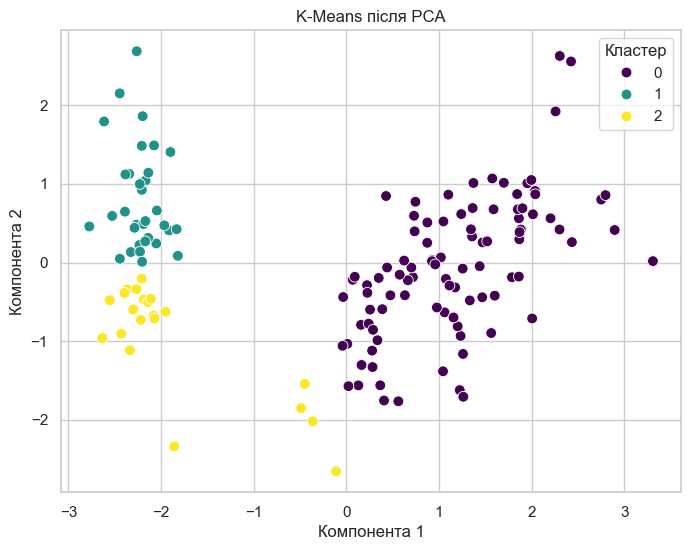

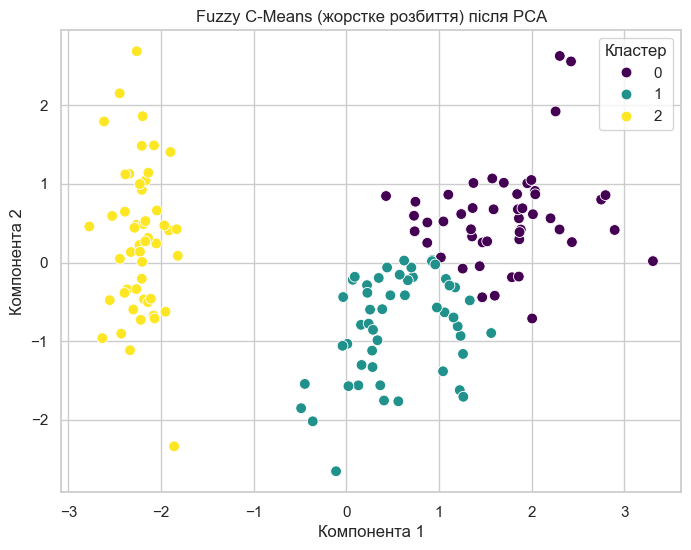

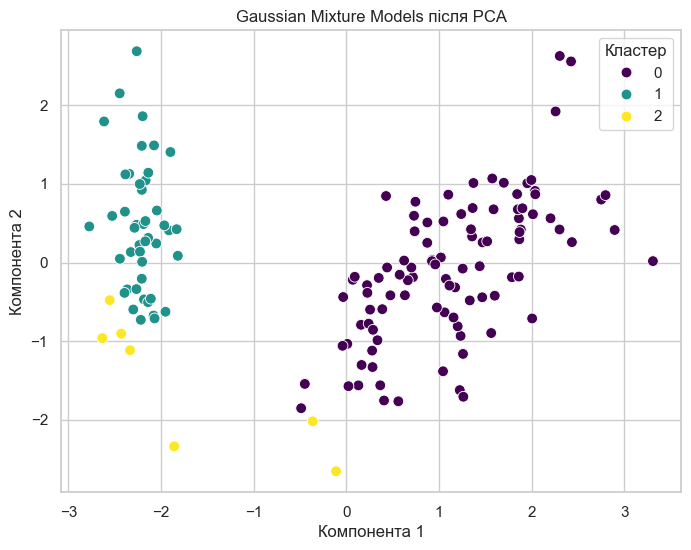

In [11]:
# Зменшення розмірності до 2 компонент за допомогою PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Відсоток поясненої варіації:", pca.explained_variance_ratio_)

# Функція для побудови графіка кластеризації
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", s=60)
    plt.title(title)
    plt.xlabel("Компонента 1")
    plt.ylabel("Компонента 2")
    plt.legend(title="Кластер")
    plt.show()

# Побудова графіків для кожного алгоритму
plot_clusters(X_pca, labels_kmeans, "K-Means після PCA")
plot_clusters(X_pca, labels_fcm, "Fuzzy C-Means (жорстке розбиття) після PCA")
plot_clusters(X_pca, labels_gmm, "Gaussian Mixture Models після PCA")
